# Housing price modelling in King County, USA

In this script we consider regression problem, that means we want to predict continous value of desired variable. In our dataset we have 'price' variable associated with price. This is our target variable which values we want to be able to predict. There is one additional variable 'price_bin' with 0 and 1 as values, where 0 means certain house is <=\\$1 mln worth, value 1 means it is > \\$1 mln worth. Normally we probably will not have that variable in real case, but let's do the hack and use it in models (in given assignment it is not forbidden to use it). The rest of variables we may treat like potential explanatory variables. To get the best model we need firstly to prepare dataset, choose model metrics, build model, optimize the model hyperparameters and assess the model.

### Agenda

1. Data exploration
1. Data preparation
3. Data modelling
4. Models evaluation
5. Choosen model optimization

## 1. Data exploration

Data exploration is a first step to enable power of data. We need to understand business background and meaning of data to specify proper mehods for problem solving. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read csv file
df_01 = pd.read_csv('house.csv')

In [3]:
# Show basic informations about data
df_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   price_bin      21613 non-null  int64  
 4   bedrooms       21613 non-null  int64  
 5   bathrooms      21613 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21613 non-null  int64  
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  int64  
 16  yr_renovated   21613 non-null  int64  
 17  zipcode        21613 non-null  int64  
 18  lat   

In the table above we may see that dataset is very clear, no missings, almost all variables are numeric. 

In [4]:
df_01.describe()

,id,price,price_bin,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,0.067783,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.251379,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,0.000000,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,0.000000,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,0.000000,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,1.000000,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


We need to divide dataset to explanatory part, and target part, which is needed to produce proper data structures as an input to data modelling algorithms. We need this disivion before data preparation to not allow for data leakage where information from training part leak to test part, or reversed. 

In [5]:
# select explanatory variables names
cols_X = [col for col in df_01.columns if col not in ['id','price']]
cols_X

['date',
 'price_bin',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [6]:
# select explanatory variables
df_X = df_01[cols_X]
df_X[0:10]

,date,price_bin,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,20140512T000000,1,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,20140627T000000,0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,20150115T000000,0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,20150415T000000,0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,20150312T000000,0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [7]:
df_X.date[0:10]

0    20141013T000000
1    20141209T000000
2    20150225T000000
3    20141209T000000
4    20150218T000000
5    20140512T000000
6    20140627T000000
7    20150115T000000
8    20150415T000000
9    20150312T000000
Name: date, dtype: object

## 2. Data preparation

Feature engineering is the key to reach high prediction performance. Below we try to convert and bin date variable to involve it to explanatory variables set.

In [8]:
# Date variable binning
import time
dates = []
##timestamp_02 = list(enumerate(timestamp))
for i in range(len(df_X.date)):
    ts = time.strptime(df_X.date[i][:19], "%Y%m%dT%H%M%S")
    if time.strftime("%m", ts)[0] == '0':
        dates.append(time.strftime("%m", ts)[1])
    else:
        dates.append(time.strftime("%m", ts))


In [9]:
# Add binned variable as a column to a dataframe
df_X['date2'] = dates

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
df_X

,date,price_bin,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date2
0,20141013T000000,0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,10
1,20141209T000000,0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,12
2,20150225T000000,0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2
3,20141209T000000,0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,12
4,20150218T000000,0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,0,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,5
21609,20150223T000000,0,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,2
21610,20140623T000000,0,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,6
21611,20150116T000000,0,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,1


In [11]:
# Delete date variable after binning
del df_X['date']

In [12]:
# Convert all variables to float
df_X = df_X.astype(float)
# = df['DataFrame Column'] = df['DataFrame Column']

In [13]:
df_X.dtypes

price_bin        float64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition        float64
grade            float64
sqft_above       float64
sqft_basement    float64
yr_built         float64
yr_renovated     float64
zipcode          float64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
date2            float64
dtype: object

In [14]:
# select response variable
df_Y = df_01['price']
df_Y[0:5]

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

## Feature importance

There are many features in dataset, and some are more useful from another. If feature represents very low level of target variable variance, or close to zero, it may even decrease model performance.

So when improving model, we may experiment with poping out less useful variables.

We may measure feature contribution to prediction of target variable for example with Extra Trees Classifier.

In [15]:
from sklearn.ensemble import ExtraTreesClassifier

In [16]:
# Extract ndarrays
Y = df_Y.values
X = df_X.values

### ExtraTreesClassifier importance

In [17]:
# data modelling
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, Y)

# feature importance extraction
model.feature_importances_

array([0.00175939, 0.04055305, 0.04891199, 0.08026661, 0.08015105,
       0.01952688, 0.00062399, 0.00957875, 0.02867319, 0.02521648,
       0.07921481, 0.0393001 , 0.07491698, 0.00617137, 0.05628704,
       0.08681111, 0.0802961 , 0.08109149, 0.07953533, 0.08111429])

In [18]:
feature_importance = pd.DataFrame(model.feature_importances_,columns=['v'])
feature_importance.iloc[0:5]

,v
0,0.001759
1,0.040553
2,0.048912
3,0.080267
4,0.080151


In [19]:
# select explanatory variables names
cols_X = [col for col in df_X.columns if col not in ['id','price']]
cols_X

['price_bin',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'date2']

In [20]:
# Sorting 
feature_importance = pd.concat([pd.DataFrame([cols_X]).T,feature_importance], axis = 1)

In [21]:
feature_importance.iloc[0:]

,0,v
0,price_bin,0.001759
1,bedrooms,0.040553
2,bathrooms,0.048912
3,sqft_living,0.080267
4,sqft_lot,0.080151
5,floors,0.019527
6,waterfront,0.000624
7,view,0.009579
8,condition,0.028673
9,grade,0.025216


In [22]:
# Sort values
feature_importance_sorted = feature_importance.sort_values(by='v', axis = 0, ascending=False)

In [23]:
feature_importance_sorted[:]

,0,v
15,lat,0.086811
19,date2,0.081114
17,sqft_living15,0.081091
16,long,0.080296
3,sqft_living,0.080267
4,sqft_lot,0.080151
18,sqft_lot15,0.079535
10,sqft_above,0.079215
12,yr_built,0.074917
14,zipcode,0.056287


As we may see in table above, when will be experimenting with improving model performance, variables 6, 0, 13 will be the very first variables to try training model without.

In [24]:
# X = np.delete(X,[5],1)
#del df_X['yr_renovated']
#del df_X['price_bin']
#del df_X['waterfront']

In [25]:
df_X.columns

Index(['price_bin', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date2'],
      dtype='object')

Nevertheless during experimentation there was found no improvement while deleting even the worst variables, which were able to do small improvements of MAE.

### Correlation matrix
To reach high performance of modelling, features should be not highly correlated. If we see strong correlation, we may use many techniques to eliminate correlation. There are many ways: 
1. We may use PCA on that group
2. Choose representant of highly correlated variables groups. 
3. Use data whitening transformation

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

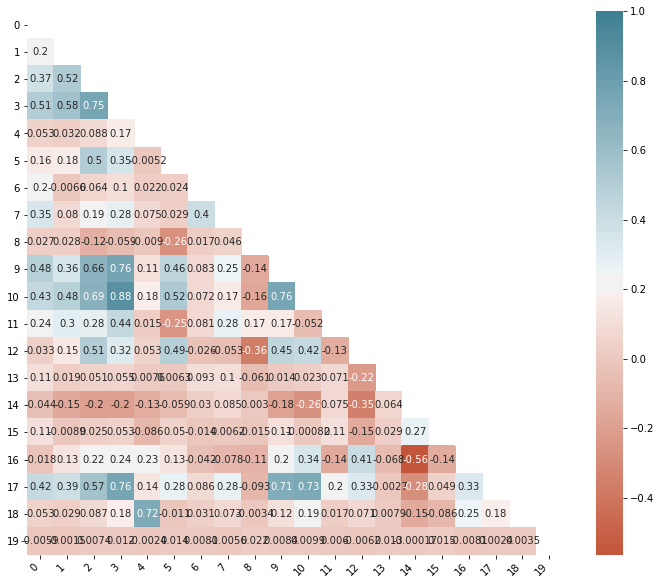

In [27]:
# Create heatmap using Pearson Correlation
plt.figure(figsize=(12,10))
cor = pd.DataFrame(X).corr()
mask = np.zeros_like(cor, dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 
chart = sns.heatmap(cor, annot=True, cmap=sns.diverging_palette(20, 220, n=200), mask=mask)#,cmap=plt.cm.Reds)
# Rotate labels on Y axis for better view
chart.set_yticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')
# Rotate labels on X axis for better view
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

However, during experimentation merging variables with PCA has not shown any improvement in MAE. It shows that even in case of strongly correlated variables in our circumstances their little variance diversity may improvement model performance.

In [28]:
# Extract ndarray again after variables modifications
X = df_X.values

### Divide to data into training and test set

We need to divide dataset to training and test part to properly measure models performance.

In [29]:
# Divide on training and validation dataset
from sklearn.model_selection import train_test_split

# split data set into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 10)
# ‘random_state’ just ensures that we get reproducible results every time.
# data - must be all X variables (pandas df / ndarray)
# target - must be Y variable (pandas df / ndarray)


### Feature Scaling
To assure high performance of algorithms, data should be standarized - transform data to state with mean = 0 and STD = 1.

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)
StandardScaler(copy=True, with_mean=True, with_std=True)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## 3. Data modelling, hyperparameters optimization and evaluation

For predicting houses prices we need to use algorithms solving regression problems.

We will use simple measure of MAE - Mean Absolute Error, which is easy to interpret. On further stages, we may use more sofisticated mothods like cross validation to reduce uncertainty of measures.

For model hyperparameters optimization we will use Random Search. In addition to searching hyperspaces, we also incorporate cross-validation technique, to be more sure that our results for each set of hyperparameters are certain, and are not just matter of luck due to favourable division on training and test set.

In case of cross-validation we will have actually training set, validation set and test set. Before we had only training and test set.

Further training and validation sets in cross-validation are created from previous training set. And finally, model is tested on test set.

Lets check which evaluation scores are available in sklearn

In [31]:
import sklearn
# Show available metrics in sklearn
sorted(sklearn.metrics.SCORERS.keys())


['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

Our MAE score is available in inversed version "neg_mean_absolute_error", I it will be used in evaluation.

### Model training

In [32]:
sklearn.__version__

'0.21.0'

In [66]:
from sklearn.neural_network import MLPRegressor

# Create model instance
mlp_reg_01 = MLPRegressor(hidden_layer_sizes=(13,13,13),
                   max_iter=500, 
                   activation='relu', # activation function
                   early_stopping=False, # Early stopping regularization method
                   solver='adam', # learning method - adam - adaptive moment estimation - SGD algorithm extension
                   verbose=False) # show informaton during training (it has only binary option - show all or nothing)
                   # squared_loss as a loss function (another loss not implementd in scikit yet - 04.2020)
# Fit the model
mlp_reg_01.fit(X_train,Y_train)



""" Parameters:

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(13, 13, 13), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
"""


C:\Users\Bartłomiej Czajewski\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


" Parameters:\n\nMLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,\n       beta_2=0.999, early_stopping=False, epsilon=1e-08,\n       hidden_layer_sizes=(13, 13, 13), learning_rate='constant',\n       learning_rate_init=0.001, max_iter=500, momentum=0.9,\n       nesterovs_momentum=True, power_t=0.5, random_state=None,\n       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,\n       verbose=False, warm_start=False)\n"

### Show Training curve

In [67]:
# Show loss scores during training process
mlp_reg_01.loss_curve_[:5]

[213211895366.8588,
 213204679741.28937,
 213158443006.42758,
 212961704182.3654,
 212391591084.8654]

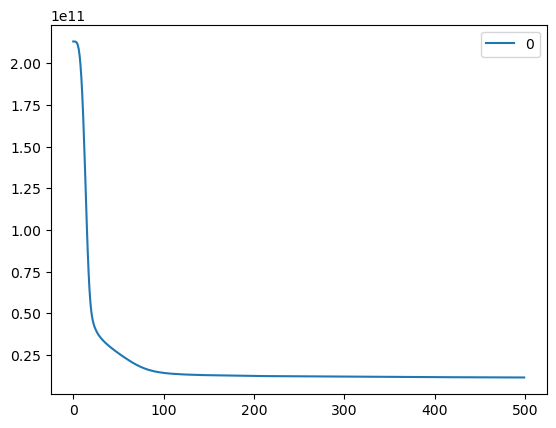

In [68]:
# Draw training curve
pd.DataFrame(mlp_reg_01.loss_curve_).plot()

In [78]:
#predictions_reg_01 = mlp_reg_01.predict(X_test)
from sklearn.metrics import mean_absolute_error, median_absolute_error
#from sklearn.metrics import explained_variance_score, r2_score, mean_squared_error
#from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model

In [79]:
# Predict with model on training set
y_pred_reg_01_train = mlp_reg_01.predict(X_train)
# Scoring on train set
score_01 = mean_absolute_error(Y_train, y_pred_reg_01_train)
print("\nMean Absolute Error - SCORE ON TRAIN DATA: {}".format(score_01))


Mean Absolute Error - SCORE ON TRAIN DATA: 93750.96321336915


In [80]:
# Predict with best parametrized model on test set
y_pred_reg_01_test = mlp_reg_01.predict(X_test)
# Scoring on test set
score_02 = mean_absolute_error(Y_test, y_pred_reg_01_test)
print("\nMean Absolute Error - SCORE ON TEST DATA: {}".format(score_02))


Mean Absolute Error - SCORE ON TEST DATA: 93915.73586162024


In [83]:
# Median Squared Error on training set
print("\nMedian Squared Error - SCORE ON TRAIN DATA: {}".format(median_absolute_error(Y_train, y_pred_reg_01_train)))


Median Squared Error - SCORE ON TRAIN DATA: 62931.98621722951


In [84]:
# Median Squared Error on test set
print("\nMedian Squared Error - SCORE ON TEST DATA: {}".format(median_absolute_error(Y_test, y_pred_reg_01_test)))



Median Squared Error - SCORE ON TEST DATA: 62947.27829507258


### Cross-validation and random search hyperparameters optimization

Below, we use RandomizedSearchCV method from Scikit-learn package for MLP hyperparameters tuning. Metaheuristic method used in this case is Grid Search combined with Random Search, which allows us to randomly pick sets of parameters from given intervals and verify model performance. Model assessment is more stable due to cross-validation method, which divide our dataset on k-folds, test model performance on each on them, and compute mean value. This resampling method harness statistical robustness to assess how our model will behave on totally new datasets.

Multilayer perceptron is widely used machine learning method. It consists of artificial neurons and multiple layers of those neurons.

According to documentation algorithm has several dozen parameters: 
<link>
Parameters choosen for optimization in this notebook are:

1. parameter (int) - ...


In [85]:
from sklearn.neural_network import MLPRegressor
from scipy import stats
from sklearn.model_selection import RandomizedSearchCV, KFold

# Defining parameters which we need to iterate over RS cycles
param_distributions = {'alpha': [0.00005, 0.0001, 0.0005],
                       'hidden_layer_sizes': [(90,90,90),(60,60,60,60)],
                       'learning_rate': ['constant', 'invscaling'],
                       'max_iter': [1000], # stats.randint(350, 700),
                       'activation': ['relu'], # activation function
                       'early_stopping': [True], # Early stopping regularization method
                       'solver': ['adam'], # learning method - adam - adaptive moment estimation - SGD algorithm extension
                       'verbose': [False] # show informaton during training (it has only binary option - show all or nothing)
                       # squared_loss as a loss function (another loss not implementd in scikit yet - 04.2020)
             }

# in frozen uniforms above eg. stats.randint(), first number 
# is lower boundary of range, and second is a bandwidth
"""param_distributions = {'hidden_layer_sizes': stats.randint(150, 500),
              'learning_rate': stats.uniform(0.01, 0.07),
              'subsample': stats.uniform(0.3, 0.7),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.45),  
              #'min_child_weight': [1, 2, 3],
              'gamma': [0, 10, 20, 40, 50]
             }
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(13, 13, 13), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
"""

# Create model instance
mlp_reg_02 = MLPRegressor()

# Random Search CV setting
rs = RandomizedSearchCV(mlp_reg_02, param_distributions, n_iter=30, scoring='neg_mean_absolute_error', cv=6, 
                         verbose=4, n_jobs=-2, random_state=2019)
                        # n_iter - is the total iterations on hyperparameters dataset
                        # (Final results was produced setting up 1000 iterations over there)
                        # cv=4 - number of folds in Cross Validation 
                        # n_jobs=-1 - there will be all available cores used on a machine which run code
                        # verbose=4 - it displays additional information during optimization, if > 0
                    
                    # dodać refit = True

# Run Random Search with cross-validation
rs_results = rs.fit(X_train, Y_train)


C:\Users\Bartłomiej Czajewski\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 12 is smaller than n_iter=30. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.


Fitting 6 folds for each of 12 candidates, totalling 72 fits


[Parallel(n_jobs=-2)]: Done  19 tasks      | elapsed: 18.0min
[Parallel(n_jobs=-2)]: Done  72 out of  72 | elapsed: 47.0min finished


In [86]:
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import explained_variance_score, median_absolute_error, r2_score, mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model

# Evaluation

# Show best parameters
print("BEST PARAMETERS: " + str(rs_results.best_params_))

# Show best CV score
print("\nMEAN MAE SCORE IN CV WITH BEST PARAMETERS: " + str(rs_results.best_score_))

# Predict with best parametrized model on training set
#y_pred_train = rs.predict(X_train) # or y_pred_train = rs_results.best_estimator_.predict(X_train)
y_pred_reg_02_train = rs_results.best_estimator_.predict(X_train)

# Scoring on train set
score_03 = mean_absolute_error(Y_train, y_pred_reg_02_train)
print("\nMean Absolute Error - SCORE ON TRAIN DATA: {}".format(score_03))

# Predict with best parametrized model on test set
#y_pred = rs.predict(X_test) # or y_pred = rs_results.best_estimator_.predict(X_test)
y_pred_reg_02_test = rs_results.best_estimator_.predict(X_test)

# Scoring on test set
score_04 = mean_absolute_error(Y_test, y_pred_reg_02_test)
print("\nMean Absolute Error - SCORE ON TEST DATA: {}".format(score_04))

# Median Squared Error on training set
print("\nMedian Squared Error - SCORE ON TRAIN DATA: {}".format(median_absolute_error(Y_train, y_pred_reg_02_train)))

# Median Squared Error on test training set
print("\nMedian Squared Error - SCORE ON TEST DATA: {}".format(median_absolute_error(Y_test, y_pred_reg_02_test)))


BEST PARAMETERS: {'verbose': False, 'solver': 'adam', 'max_iter': 1000, 'learning_rate': 'constant', 'hidden_layer_sizes': (60, 60, 60, 60), 'early_stopping': True, 'alpha': 5e-05, 'activation': 'relu'}

MEAN MAE SCORE IN CV WITH BEST PARAMETERS: -82262.21104061826

Mean Absolute Error - SCORE ON TRAIN DATA: 71487.4671617668

Mean Absolute Error - SCORE ON TEST DATA: 72213.19265081521

Median Squared Error - SCORE ON TRAIN DATA: 46553.806495786295

Median Squared Error - SCORE ON TEST DATA: 46322.46891243121


In [94]:
# Access all arrays from RS CV with training results 
rs_results.cv_results_

{'mean_fit_time': array([244.26499049, 131.10577472, 124.44592071, 108.03148337,
        162.77797488,  67.04694748, 102.42452848, 117.05148753,
         73.84472299,  77.06821052,  72.00844042,  92.00549356]),
 'std_fit_time': array([166.91868795,  90.07595634,  67.33391639,  39.04940334,
        113.5567859 ,  20.15915926,  70.31047057,  71.44648954,
         29.47970667,  42.65324606,  33.85633549,  36.31755743]),
 'mean_score_time': array([0.04414109, 0.04597334, 0.04230932, 0.03797889, 0.04297574,
        0.0416431 , 0.0393105 , 0.03931014, 0.04197566, 0.04330941,
        0.03564636, 0.03764439]),
 'std_score_time': array([0.00542578, 0.0091241 , 0.00998841, 0.00457985, 0.00621604,
        0.00354088, 0.00524658, 0.00561405, 0.00559525, 0.00314287,
        0.00749427, 0.00292283]),
 'param_verbose': masked_array(data=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
              mask=[False, False, False, False, False, False

In [44]:
# Access model with best parameters and show parameters of best estimator
rs_results.best_estimator_

MLPRegressor(activation='relu', alpha=0.0005, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=True, epsilon=1e-08,
             hidden_layer_sizes=(60, 60, 60, 60), learning_rate='constant',
             learning_rate_init=0.001, max_iter=1000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

#### Training curve

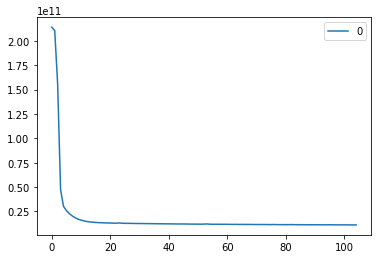

In [45]:
pd.DataFrame(rs_results.best_estimator_.loss_curve_).plot()

In [91]:
print(rs_results.cv_results_['params'][2])
print(rs_results.cv_results_['mean_test_score'][2])
print(rs_results.cv_results_['rank_test_score'][2])

{'verbose': False, 'solver': 'adam', 'max_iter': 1000, 'learning_rate': 'constant', 'hidden_layer_sizes': (60, 60, 60, 60), 'early_stopping': True, 'alpha': 5e-05, 'activation': 'relu'}
-82262.21104061826
1


In [63]:
# Access all arrays from RS CV with training results 
#rs_results.cv_results_

In [47]:
# Check params of first parameters set 
#rs_results.cv_results_['params'][0]

In [48]:
# Check score of first parameters set
#rs_results.cv_results_['mean_test_score'][0]

In [49]:
# Show rank of the score
#rs_results.cv_results_['rank_test_score'][0]

### Final model score comparison on test set

#### XGBoost

Best result from parameters tuning experiments 

BEST PARAMETERS: {'colsample_bytree': 0.7540439218263817, 'gamma': 0, 'learning_rate': 0.031858586566719346, 'max_depth': 8, 'n_estimators': 483, 'subsample': 0.9165579213623491}

MEAN MAE SCORE IN CV WITH BEST PARAMETERS: -58574.29418924334

Mean Absolute Error - SCORE ON TRAIN DATA: 29107.730687958556

Mean Absolute Error - SCORE ON TEST DATA: 58592.98350988973

Median Squared Error - SCORE ON TRAIN DATA: 21225.40625

Median Squared Error - SCORE ON TEST DATA: 35522.328125

#### MLP

BEST PARAMETERS: {'verbose': False, 'solver': 'adam', 'max_iter': 1000, 'learning_rate': 'constant', 'hidden_layer_sizes': (60, 60, 60, 60), 'early_stopping': True, 'alpha': 5e-05, 'activation': 'relu'}

MEAN MAE SCORE IN CV WITH BEST PARAMETERS: -82262.21104061826

Mean Absolute Error - SCORE ON TRAIN DATA: 71487.4671617668

Mean Absolute Error - SCORE ON TEST DATA: 72213.19265081521

Median Squared Error - SCORE ON TRAIN DATA: 46553.806495786295

Median Squared Error - SCORE ON TEST DATA: 46322.46891243121

#### Results analysis

As far as we may see, XGBoost model got better performance. Multi-layer perceptrons are harder to train, and hyper parameters tuning is more longer and resource demanding. MLP hyper-parameters tuning is the task for the future. 

The difference in performance of MLP in cross-validation, and on test set may be a result of smaller training dataset. MLP is very sensitive to amount of data. After cross-validation, model with best parameters was retrained on whole training set, and this resulted in better performance on test set than in cross-validation. 

Techniques with resulted in improvements on test set:
1. -tbc

Used methods which not resulted in improvements: 
1. -tbc

### Afterword

In the future more tasks may be done to inscrease performance:
1. Experiment with better data preprocessing (data scaling, data whitening, etc.)
2. Implement data pipeline to prevent data leakage during cross-validation
3. Continue experiments with hyperparameters tuning 


### Reproducibility Note
**Libraries used in the notebook:**

scipy==1.4.1

scikit-learn==0.21.0

numpy==1.18.2

seaborn==0.10.0

pandas==1.0.3

matplotlib==3.2.1